In [1]:
import json
import os
from collections import Counter, defaultdict


In [2]:
with open("../trex/re-nlg_0-10000.json") as f:
    trex = json.load(f)

In [29]:
types = {
    "http://www.wikidata.org/prop/direct/P31": ["is a", "has type"],
    "http://www.wikidata.org/prop/direct/P47": ["shares a border with", "is bordered by", "adjacent to"],
    "http://www.wikidata.org/prop/direct/P361": ["is part of"],
    "http://www.wikidata.org/prop/direct/P30": ["is in the continent of"],
    "http://www.wikidata.org/prop/direct/P17": ["is in the country of"],
    "http://www.wikidata.org/prop/direct/P37": ["is the official language of"],
}

questions = {
    "http://www.wikidata.org/prop/direct/P31": ["Is $s a $p? TRUE", "Is $s a type of $p? TRUE", "What is a $s? A $p"],
    "http://www.wikidata.org/prop/direct/P47": ["Does $s share a border with $p? TRUE", "Is $s bordered by $p? TRUE", "Is $s adjacent to $p? TRUE", "What borders $s? (SET)$p"],
    "http://www.wikidata.org/prop/direct/P361": ["Is $s part of $p? TRUE", "What are parts of $p? (SET)$s", "Where is $s? $p"],
    "http://www.wikidata.org/prop/direct/P279": ["Is $s a type of $p? TRUE"],
    "http://www.wikidata.org/prop/direct/P30": ["Is $s in the continent of $p? TRUE", "What countries are in $p? (SET)$s", "Where is $s? $p"],
    "http://www.wikidata.org/prop/direct/P17": ["Is $s in the country of $p? TRUE", "What is in $p? (SET)$s", "Where is $s? $p"],
    "http://www.wikidata.org/prop/direct/P37": ["Is $p a language of $s? TRUE", "Is $p an official langauge of $s? TRUE", "What languages are spoken in $s? (SET)$p", "Where is $p spoken? (SET)$s"],
}

new_questions = {
    "http://www.wikidata.org/prop/direct/P1056": ["Is $o produced by $s? TRUE", "$s produces which items? (SET)$o", "$o is produced by which manufacturer? $s"],
    "http://www.wikidata.org/prop/direct/P123": ["Is $o a publisher of $s? TRUE", "Is $s published by $o? TRUE", "What does $o publish? (SET)$s", "Who publishes $s? $o"],
}

item_types = defaultdict(set)
type_items = defaultdict(set)

relations = defaultdict(int)
counter = Counter()
sents_with_1 = 0
total_sents = 0
for idx, i in enumerate(trex):
    scores = defaultdict(list)
    for trip in i['triples']:
        scores[trip['sentence_id']].append(trip)


    for k,v in scores.items():
        if len(v) == 1:
            sents_with_1+=1
            relations[v[0]['predicate']['uri']] += 1
            sent_id = v[0]['sentence_id']
            print(i['text'].split(". ")[sent_id])
            print(v[0]['subject']['surfaceform'])
            print(v[0]['predicate']['uri'])
            print()
        total_sents+=1

    continue

    for trip in i['triples']:
        counter[trip['predicate']['uri']] += 1
        relations[trip['predicate']['uri']].append(trip)

        if trip["predicate"]['uri'] == "http://www.wikidata.org/prop/direct/P31":
            item_types[trip["object"]['surfaceform']].add(trip["subject"]['surfaceform'])
            item_types[trip["subject"]['surfaceform']].add(trip["object"]['surfaceform'])

print(total_sents)
print(sents_with_1)
print(len(relations))

These form thirteen established families (plus perhaps Shompen, which is poorly attested, as a fourteenth), which have traditionally been grouped into two, as Mon–Khmer and Munda
Munda
http://www.wikidata.org/prop/direct/P279

For example, per capita income is the arithmetic average income of a nation's population
Arithmetic mean
http://www.wikidata.org/prop/direct/P279

In addition to mathematics and statistics, the arithmetic mean is used frequently in fields such as economics, sociology, and history, and it is used in almost every academic field to some extent
arithmetic
http://www.wikidata.org/prop/direct/P361

In philosophy and logic, an argument is an attempt to persuade someone of something, or give evidence or reasons for accepting a particular conclusion
logic
http://www.wikidata.org/prop/direct/P279

After two early novels that were initially unsuccessful in America, she achieved fame with her 1943 novel, The Fountainhead
Ayn Rand
http://www.wikidata.org/prop/direct/P800

In 

IndexError: list index out of range

In [136]:
common_answer_true = {}
common_answer_sets = defaultdict(set)
for question, triple in created:
    q,a = question.split("?")
    q = q.strip()
    a = a.strip()

    if "(SET)" in a:
        a = a.replace("(SET)","").strip()
        common_answer_sets[q].add(a)
    else:
        common_answer_true[q] = a

for question, triple in created:
    item_type = item_types[triple["object"]["surfaceform"]]
    #print([item_types[t] for t in item_type])

print(common_answer_sets)


defaultdict(<class 'set'>, {'Apple Inc. produces which items': {'iPhone', 'iPod', 'Apple Watch', 'iPad'}, 'Commodore produces which items': {'C64'}, 'Audi produces which items': {'automobile'}, 'gonads produces which items': {'sex hormones'}, 'Airbus produces which items': {'airliner'}, 'brewing produces which items': {'beer'}, 'breweries produces which items': {'beer'}, 'Brewing produces which items': {'beer'}, 'Volkswagen produces which items': {'automobile'}, 'Renault produces which items': {'automobile'}, 'Be Inc. produces which items': {'BeOS'}, 'Mandrakesoft produces which items': {'Mandriva Linux'}, 'Mandriva produces which items': {'Mandriva Linux', 'Mandrake Linux'}, 'Commodore Business Machines (CBM) produces which items': {'C64', 'C128'}, 'CBM produces which items': {'C64', 'C-64'}, 'Commodore International produces which items': {'C64', 'C-64', 'Commodore 64'}, 'Commodore 64 produces which items': {'C64', 'C-64'}, 'The Coca-Cola Company produces which items': {'It'}, 'cocoa

In [ ]:
        #if trip['predicate']['surfaceform'] is not None:
            #print("{} {} {}".format(trip['subject']['surfaceform'],trip['predicate']['surfaceform'], trip['object']['surfaceform']))

        if trip['predicate']['uri'] in types:
            rel = types[trip['predicate']['uri']]
            for re in rel:
                pass
                #print("{} {} {}".format(trip['subject']['surfaceform'], re, trip['object']['surfaceform']))
        else:
            #print(trip['predicate']['uri'])
            pass

        if trip['predicate']['uri'] in questions:
            rel = questions[trip['predicate']['uri']]
            #for re in rel:
                #print(re.replace("$s",trip['subject']['surfaceform']).replace("$p",trip['object']['surfaceform']))


    #print(i['entities'])
    #print(i['entities'][0].keys())
    #for entity in i['entities']:
    #    print(entity['boundaries'])

print(len(trex))

417
[('http://www.wikidata.org/prop/direct/P17', 8318), ('http://www.wikidata.org/prop/direct/P47', 7763), ('http://www.wikidata.org/prop/direct/P31', 5462), ('http://www.wikidata.org/prop/direct/P279', 4409), ('http://www.wikidata.org/prop/direct/P27', 3301), ('http://www.wikidata.org/prop/direct/P131', 3058), ('http://www.wikidata.org/prop/direct/P530', 3049), ('http://www.wikidata.org/prop/direct/P361', 2767), ('http://www.wikidata.org/prop/direct/P106', 2719), ('http://www.wikidata.org/prop/direct/P527', 2333), ('http://www.wikidata.org/prop/direct/P569', 2153), ('http://www.wikidata.org/prop/direct/P570', 1915), ('http://www.wikidata.org/prop/direct/P463', 1835), ('http://www.wikidata.org/prop/direct/P37', 1511), ('http://www.wikidata.org/prop/direct/P1411', 1460), ('http://www.wikidata.org/prop/direct/P150', 1436), ('http://www.wikidata.org/prop/direct/P1412', 1074), ('http://www.wikidata.org/prop/direct/P136', 1013), ('http://www.wikidata.org/prop/direct/P138', 995), ('http://ww

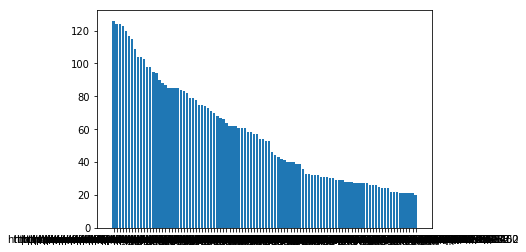

In [65]:
print(len(counter))
print(counter.most_common(100))

import matplotlib.pyplot as plt
rns = []
vs = []
for k,v in counter.most_common(200)[100:]:
    rns.append(k)
    vs.append(v)

plt.bar(rns,vs)
plt.show()
